<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-09-01 15:17:09--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.2’

m4_survey_data.sqli 100%[===================>]  34.98M  38.4MB/s    in 0.9s    

2024-09-01 15:17:11 (38.4 MB/s) - ‘m4_survey_data.sqlite.2’ saved [36679680/36679680]



Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [3]:
import pandas as pd
import numpy as np
#import piplite
#await piplite.install('seaborn')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Demo: How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [18]:
table_name = 'DatabaseDesireNextYear'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "DatabaseDesireNextYear" (
"Respondent" INTEGER,
  "DatabaseDesireNextYear" TEXT
)


In [5]:
QUERY = """
SELECT Respondent,COUNT(*) as count
FROM DatabaseDesireNextYear
group by Respondent
order by Respondent
"""
pd.read_sql_query(QUERY,conn)

,Respondent,count
0,4,2
1,9,3
2,13,3
3,16,4
4,17,4
...,...,...
10351,25134,5
10352,25136,1
10353,25137,3
10354,25141,4


In [7]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [5]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [6]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


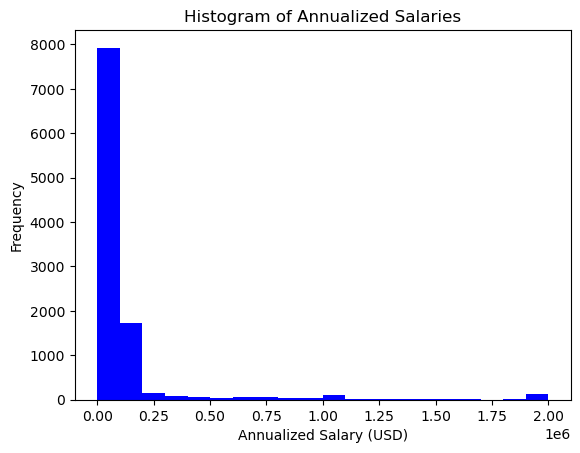

In [12]:
# your code goes here
QUERY = """
SELECT ConvertedComp
FROM master
"""
df = pd.read_sql_query(QUERY,conn)
plt.hist(df['ConvertedComp'], bins=20, color='blue')
plt.title('Histogram of Annualized Salaries')
plt.xlabel('Annualized Salary (USD)')
plt.ylabel('Frequency')
plt.show()

### Box Plots


Plot a box plot of `Age.`


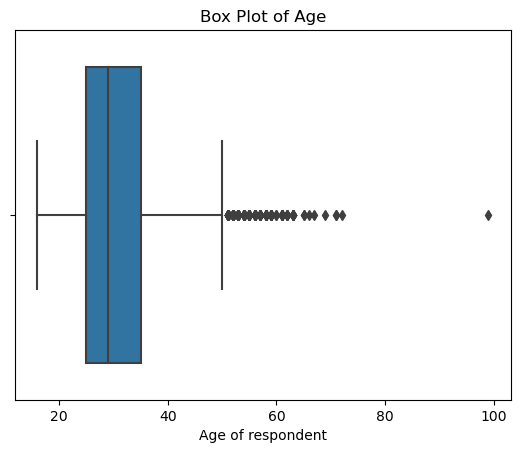

In [14]:
# your code goes here
QUERY = """
SELECT Age
FROM master
"""
df = pd.read_sql_query(QUERY,conn)
sns.boxplot(x=df['Age'])
plt.title('Box Plot of Age')
plt.xlabel('Age of respondent')
plt.show()


## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


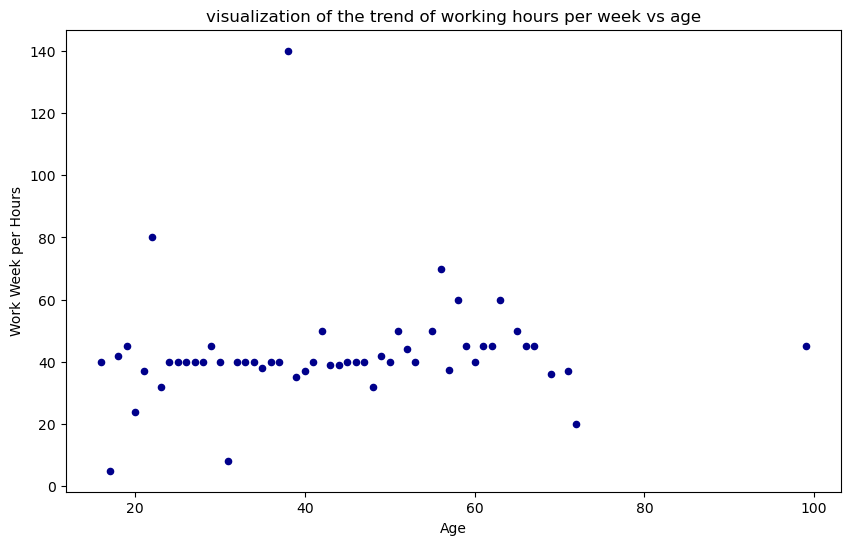

In [17]:
# your code goes here
QUERY = """
SELECT Age, WorkWeekHrs
FROM master
group by age
"""
df = pd.read_sql_query(QUERY,conn)

df.plot(kind='scatter', x='Age', y='WorkWeekHrs', figsize=(10, 6), color='darkblue')

plt.title('visualization of the trend of working hours per week vs age')
plt.xlabel('Age')
plt.ylabel('Work Week per Hours')

plt.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


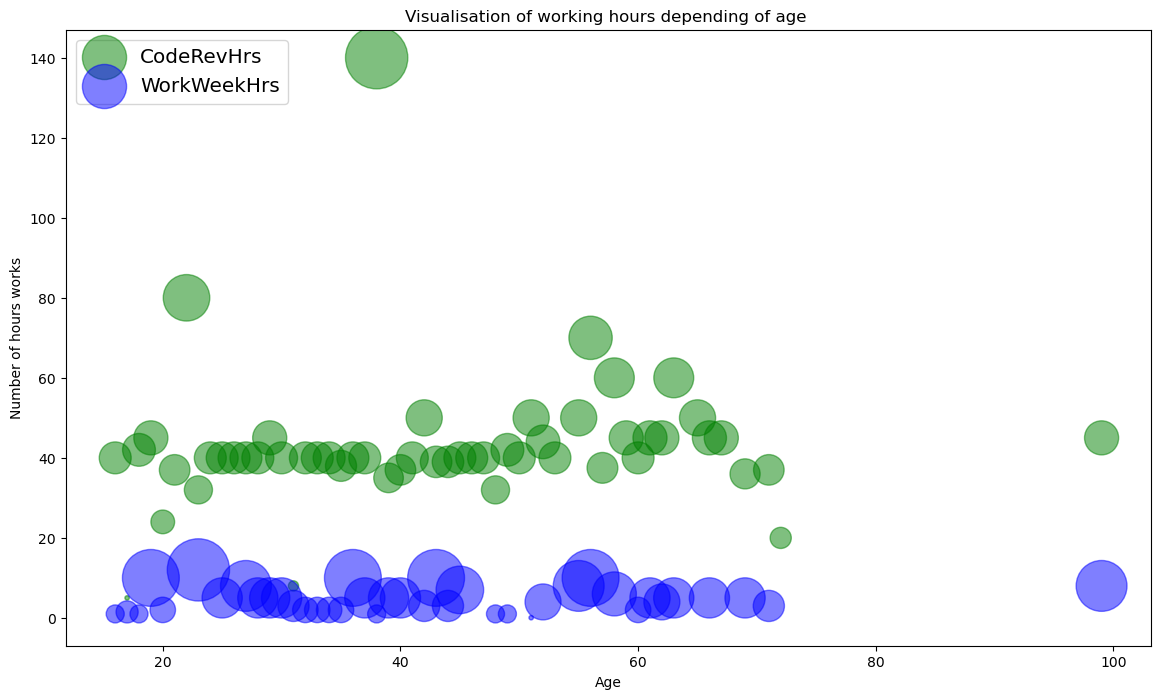

In [20]:
# your code goes here
QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master
group by Age
"""
df = pd.read_sql_query(QUERY,conn)

# normalize WorkWeekHrs data
norm_WorkHrs = (df['WorkWeekHrs'] - df['WorkWeekHrs'].min()) / (df['WorkWeekHrs'].max() - df['WorkWeekHrs'].min())

# normalize CodeRevHrs data
norm_CodeHrs = (df['CodeRevHrs'] - df['CodeRevHrs'].min()) / (df['CodeRevHrs'].max() - df['CodeRevHrs'].min())

# WorkWeekHrs
ax0 = df.plot(kind='scatter',
                    x='Age',
                    y='WorkWeekHrs',
                    figsize=(14, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s=norm_WorkHrs  * 2000 + 10,  # pass in weights 
                    #xlim=(1975, 2015)
                    )

# CodeRevHrs
ax1 = df.plot(kind='scatter',
                    x='Age',
                    y='CodeRevHrs',
                    alpha=0.5,
                    color="blue",
                    s=norm_CodeHrs  * 2000 + 10,
                    ax=ax0
                    )

ax0.set_ylabel('Number of hours works')
ax0.set_title('Visualisation of working hours depending of age ')
ax0.legend(['CodeRevHrs', 'WorkWeekHrs'], loc='upper left', fontsize='x-large')

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


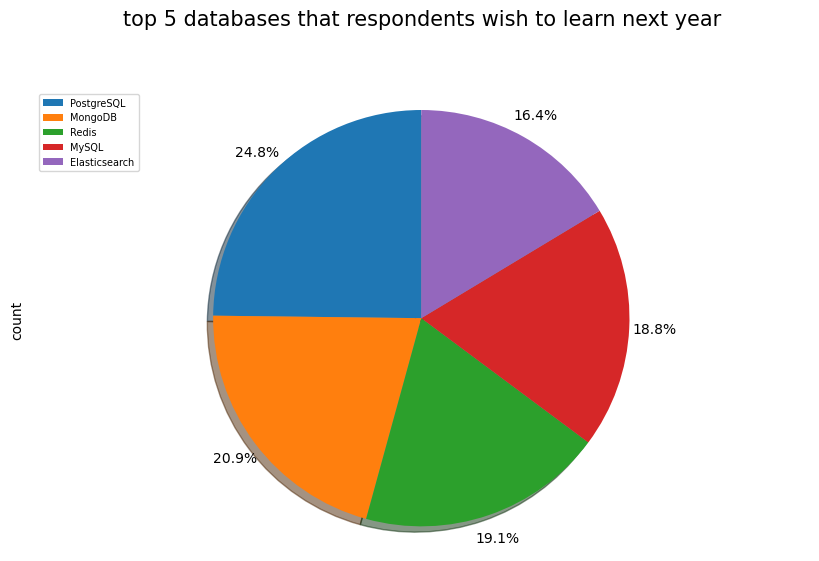

In [17]:
# your code goes here
QUERY = """
SELECT DatabaseDesireNextYear,COUNT(*) as count
FROM DatabaseDesireNextYear
group by DatabaseDesireNextYear
order by count DESC
LIMIT 5
"""
df = pd.read_sql_query(QUERY,conn)
df.set_index('DatabaseDesireNextYear', inplace=True)
 

colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen']
explode_list = [0.1, 0, 0, 0, 0.1] # ratio for each database with which to offset each wedge.

df['count'].plot(kind='pie',
                            figsize=(10, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            #colors=colors_list,  # add custom colors
                            #explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('top 5 databases that respondents wish to learn next year', y=1.12, fontsize = 15) 

plt.axis('equal') 

# add legend
plt.legend(labels=df.index, loc='upper left', fontsize=7) 

plt.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


,Age,WorkWeekHrs,CodeRevHrs
0,30.0,40.0,4.0
1,31.0,40.0,4.0
2,32.0,40.0,4.0
3,33.0,40.0,4.0
4,34.0,40.0,4.0
5,35.0,40.0,4.0


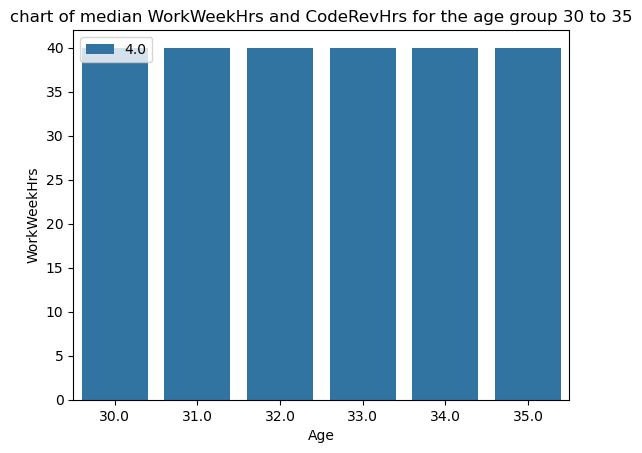

In [57]:
# your code goes here
import seaborn as sns
QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master
WHERE Age BETWEEN 30 AND 35
"""
df = pd.read_sql_query(QUERY,conn)
#df
grouped_df = df.groupby(['Age'],as_index= False).median()

#plt.figure(figsize=(15, 10))
sns.barplot(x='Age', y='WorkWeekHrs', hue='CodeRevHrs', data=grouped_df)
plt.title('chart of median WorkWeekHrs and CodeRevHrs for the age group 30 to 35')
plt.legend(loc='upper left')
grouped_df

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


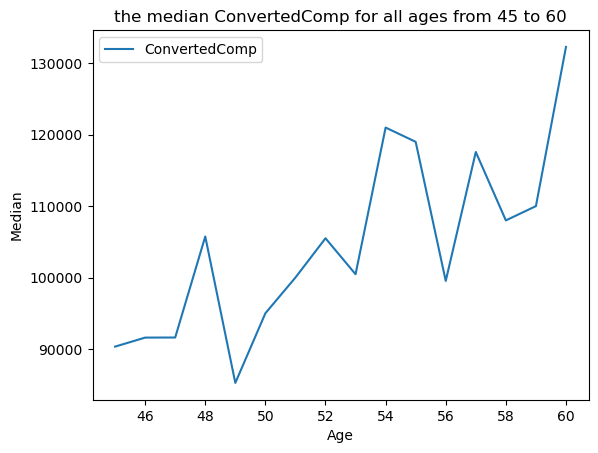

In [67]:
# your code goes here
QUERY = """
SELECT Age, ConvertedComp
FROM master
WHERE Age BETWEEN 45 AND 60
"""
df = pd.read_sql_query(QUERY,conn)
grouped_df = df.groupby(['Age'],as_index= False).median()
grouped_df.plot(x='Age', y='ConvertedComp')
plt.xlabel('Age')
plt.ylabel('Median')
plt.title('the median ConvertedComp for all ages from 45 to 60')
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


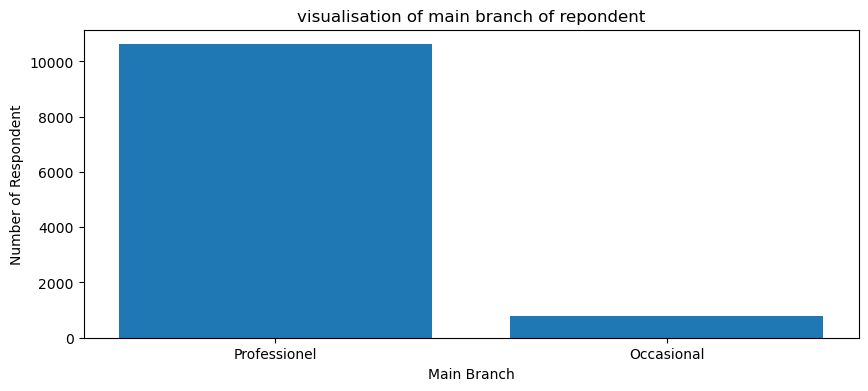

In [77]:
# your code goes here
QUERY = """
SELECT MainBranch, COUNT(*) as count
FROM master
group by MainBranch
"""
df = pd.read_sql_query(QUERY,conn)
#resetting the index back to original way
df_bar_5=df.reset_index()

#Creating alist of names of the top 5 countries
label=list(df_bar_5.MainBranch)
label[0]='Professionel'
label[1]='Occasional'
#label
fig, ax = plt.subplots(figsize=(10, 4))

ax.bar(label, df['count'], label=label)
ax.set_title('visualisation of main branch of repondent')
ax.set_ylabel('Number of Respondent')
ax.set_xlabel('Main Branch')

plt.show()

Close the database connection.


In [ ]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
